In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
breast_img_paths = kagglehub.dataset_download('paultimothymooney/breast-histopathology-images')

print('Data source import complete.')

100%|██████████| 3.10G/3.10G [00:16<00:00, 203MB/s]

Extracting files...


Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from skimage.io import imread
import cv2

all_files = glob.glob(f"{breast_img_paths}/**/*.png", recursive=True)
benign = []
melignant = []
for file in all_files:
    if "_class0.png" in file:
        benign.append(file)
    elif "_class1.png" in file:
        melignant.append(file)
array_benign=np.array(benign)
array_melignant=np.array(melignant)

print("\nbenign (Non-IDC) Files:\n", array_benign)
print("\nmelignant (IDC) Files:\n", array_melignant)


benign (Non-IDC) Files:
 ['/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/10276/0/10276_idx5_x1051_y401_class0.png'
 '/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/10276/0/10276_idx5_x251_y501_class0.png'
 '/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/10276/0/10276_idx5_x1751_y1151_class0.png'
 ...
 '/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/9319/0/9319_idx5_x1101_y551_class0.png'
 '/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/9319/0/9319_idx5_x1401_y301_class0.png'
 '/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/9319/0/9319_idx5_x701_y901_class0.png']

melignant (IDC) Files:
 ['/root/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/10276/1/10276_idx5_x1601_y1101_class1.png'
 '/root/.ca

In [ ]:
print("Number of benign(Non-IDC) Files:", len(array_benign))
print("Number of melignant(IDC) Files:", len(array_melignant))

Number of benign(Non-IDC) Files: 397476
Number of melignant(IDC) Files: 157572


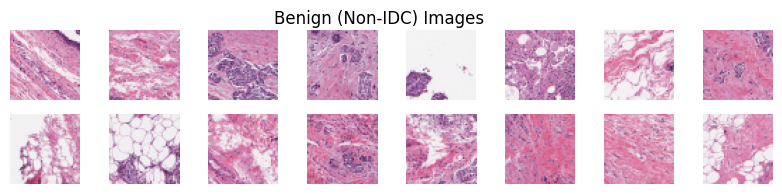

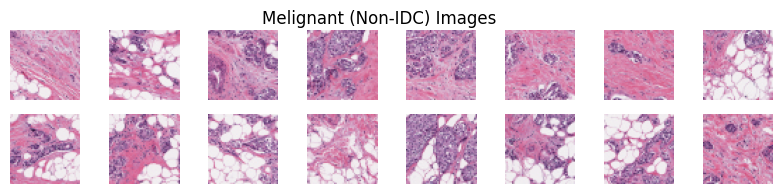

In [ ]:
def display_images(images, title, num_images=16):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        img = Image.open(images[i])
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()
display_images(array_benign, title="Benign (Non-IDC) Images")
display_images(array_melignant, title="Melignant (Non-IDC) Images")

In [ ]:
file_paths = list(array_benign) + list(array_melignant)
labels = [0] * len(array_benign) + [1] * len(array_melignant)
df = pd.DataFrame({'Filepath': file_paths, 'Label': labels})
print(df.head(5))
print(df.tail(5))

                                            Filepath  Label
0  /root/.cache/kagglehub/datasets/paultimothymoo...      0
1  /root/.cache/kagglehub/datasets/paultimothymoo...      0
2  /root/.cache/kagglehub/datasets/paultimothymoo...      0
3  /root/.cache/kagglehub/datasets/paultimothymoo...      0
4  /root/.cache/kagglehub/datasets/paultimothymoo...      0
                                                 Filepath  Label
555043  /root/.cache/kagglehub/datasets/paultimothymoo...      1
555044  /root/.cache/kagglehub/datasets/paultimothymoo...      1
555045  /root/.cache/kagglehub/datasets/paultimothymoo...      1
555046  /root/.cache/kagglehub/datasets/paultimothymoo...      1
555047  /root/.cache/kagglehub/datasets/paultimothymoo...      1


<ipython-input-7-2d88c465ce4f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['Label'].value_counts().index, y = df['Label'].value_counts(), palette='Set2')


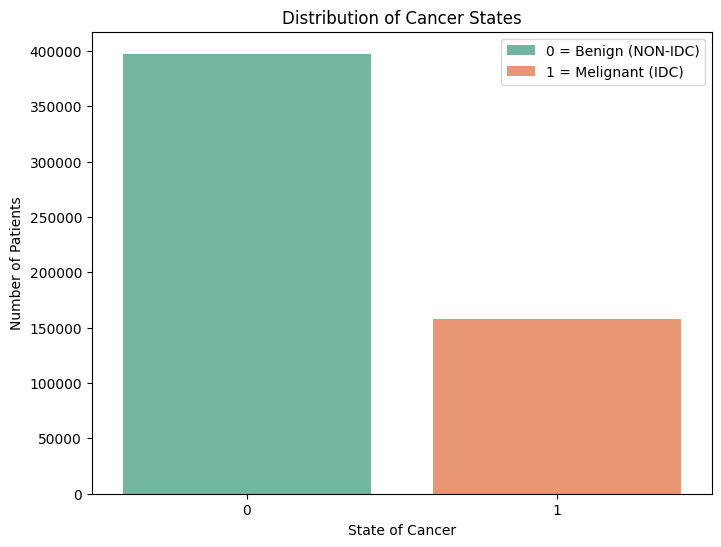

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df['Label'].value_counts().index, y = df['Label'].value_counts(), palette='Set2')
plt.xlabel('State of Cancer')
plt.ylabel('Number of Patients')
plt.title('Distribution of Cancer States')
plt.legend(handles=ax.patches[:2], labels=['0 = Benign (NON-IDC)', '1 = Melignant (IDC)'], loc='upper right')
plt.show()

OVERSAMPLE

Balanced DataFrame shape: (794952, 2)


<ipython-input-8-f4dbdc02d85e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_balanced_oversample['Label'].value_counts().index, y = df_balanced_oversample['Label'].value_counts(), palette='Set2')


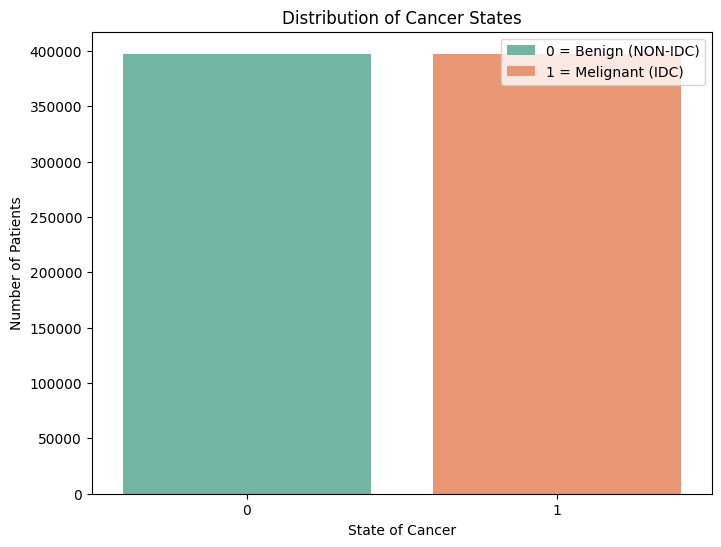

In [ ]:
benign_new_over = df[df['Label'] == 0]
melignant_new_over = df[df['Label'] == 1]
pos_balanced = resample(melignant_new_over, replace=True, n_samples=len(benign_new_over), random_state=42)
df_balanced_oversample = pd.concat([benign_new_over, pos_balanced])
print(f'Balanced DataFrame shape: {df_balanced_oversample.shape}')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df_balanced_oversample['Label'].value_counts().index, y = df_balanced_oversample['Label'].value_counts(), palette='Set2')
plt.xlabel('State of Cancer')
plt.ylabel('Number of Patients')
plt.title('Distribution of Cancer States')
plt.legend(handles=ax.patches[:2], labels=['0 = Benign (NON-IDC)', '1 = Melignant (IDC)'], loc='upper right')
plt.show()

UNDERSAMPLE

Balanced DataFrame shape: (315144, 2)


<ipython-input-9-75e7c483fd76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_balanced_undersample['Label'].value_counts().index, y = df_balanced_undersample['Label'].value_counts(), palette='Set2')


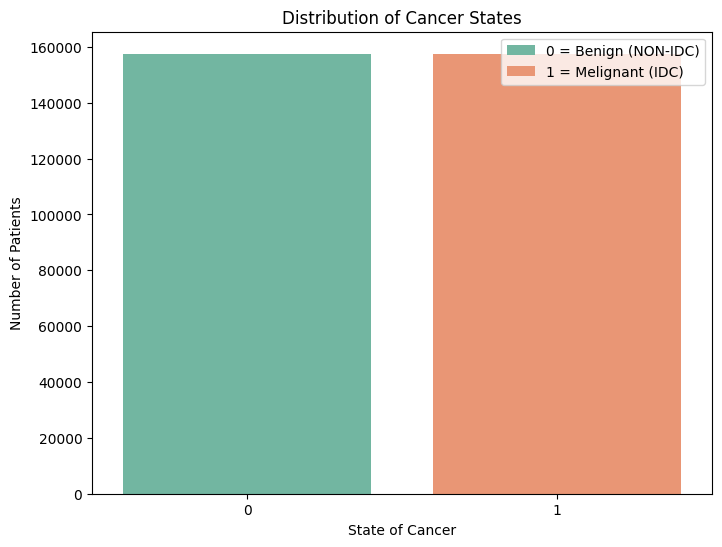

In [ ]:
benign_new_under = df[df['Label'] == 0]
melignant_new_under = df[df['Label'] == 1]
pos_balanced = resample(benign_new_under, replace=False, n_samples=len(melignant_new_under), random_state=42)
df_balanced_undersample = pd.concat([melignant_new_under, pos_balanced])
print(f'Balanced DataFrame shape: {df_balanced_undersample.shape}')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df_balanced_undersample['Label'].value_counts().index, y = df_balanced_undersample['Label'].value_counts(), palette='Set2')
plt.xlabel('State of Cancer')
plt.ylabel('Number of Patients')
plt.title('Distribution of Cancer States')
plt.legend(handles=ax.patches[:2], labels=['0 = Benign (NON-IDC)', '1 = Melignant (IDC)'], loc='upper right')
plt.show()

In [ ]:
def image_to_array(filepath):
    try:
        img = Image.open(filepath)
        img_array = np.array(img)
        return img_array
    except Exception as e:
        print(f"Error loading image {filepath}: {e}")
        return None
#df_balanced_oversample['Image_Array'] = df_balanced_oversample['Filepath'].apply(image_to_array)
df_balanced_undersample['Image_Array'] = df_balanced_undersample['Filepath'].apply(image_to_array)
#print("\nOVERSAMPLE DATASET")
#print(df_balanced_oversample.head())

image_size = (50,50)
def resize_and_normalize(image_array):
    img = Image.fromarray(image_array.astype('uint8'))
    img = img.resize(image_size)
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

df_balanced_undersample['Image_Array'] = df_balanced_undersample['Image_Array'].apply(resize_and_normalize)


print("\nUNDERSAMPLE DATASET")
print(df_balanced_undersample.head(5))
print(df_balanced_undersample.tail(5))

In [ ]:
df_new = df_balanced_undersample.drop(columns=['Filepath'])
print(df_new.head(5))
print(df_new.tail(5))

In [ ]:
print("First image after resize and normalization:", df_new['Image_Array'].iloc[0][:5, :5])
print(df_new['Image_Array'].apply(lambda x: x.shape).unique())


First image after resize and normalization: [[[0.79215686 0.56862745 0.72941176]
  [0.81176471 0.63921569 0.77254902]
  [0.83529412 0.69019608 0.80392157]
  [0.84705882 0.68235294 0.79607843]
  [0.84313725 0.68235294 0.79215686]]

 [[0.60392157 0.37254902 0.59215686]
  [0.50196078 0.31764706 0.52941176]
  [0.68627451 0.43529412 0.65490196]
  [0.54117647 0.34509804 0.56078431]
  [0.75686275 0.55686275 0.72941176]]

 [[0.69411765 0.44313725 0.6627451 ]
  [0.61960784 0.39607843 0.61568627]
  [0.54117647 0.35294118 0.54901961]
  [0.6627451  0.42745098 0.63137255]
  [0.63921569 0.40784314 0.60784314]]

 [[0.6627451  0.43137255 0.63137255]
  [0.63137255 0.4        0.61176471]
  [0.59607843 0.37254902 0.58431373]
  [0.62745098 0.37647059 0.58823529]
  [0.63529412 0.39607843 0.58823529]]

 [[0.68627451 0.44313725 0.65490196]
  [0.60392157 0.36078431 0.56470588]
  [0.41176471 0.22745098 0.44705882]
  [0.52941176 0.31372549 0.54509804]
  [0.75686275 0.49803922 0.67843137]]]
[(50, 50, 3)]


In [ ]:
X = np.stack(df_new['Image_Array'].values)
y = df_new['Label'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (220600, 50, 50, 3), (220600,)
Validation set shape: (63029, 50, 50, 3), (63029,)
Test set shape: (31515, 50, 50, 3), (31515,)


In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 batch_normalization_2 (Bat  (None, 50, 50, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 128)       36992     
                                                                 
 batch_normalization_3 (Bat  (None, 25, 25, 128)       512       
 chNormalization)                                                
                                                      

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=64, callbacks=[early_stopping, lr_reduction])

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print("validation Accuracy:", accuracy)
print("Loss:", loss)

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_classes))

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()